In [222]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Deep Neural Networks 

## Moons and Decision boundary

## Import Statements

In [223]:
###-----------------
### Import libraries
###-----------------
from pathlib import Path  # Import Path for file system path operations and management
import numpy as np  # Import NumPy for numerical computations and array operations
import pandas as pd  # Import Pandas for data manipulation and analysis with DataFrames
import matplotlib.pyplot as plt  # Import Matplotlib for creating static, interactive visualizations
import seaborn as sns  # Import Seaborn for statistical data visualization built on Matplotlib
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split  # Import function to split dataset into training and testing subsets
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             f1_score)  # Import function to calculate various metric
from sklearn.preprocessing import StandardScaler

In [224]:
###------------------
### Global Parameters
###------------------

# # Directories
# #inpDir = '../../input'
# inpDir = Path('..') / '..' / 'input'
# # outDir = '../output'
# outDir = Path('..') / 'output'


RANDOM_STATE = 42
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results
rng=np.random.default_rng(seed=RANDOM_STATE)
TEST_SIZE  = 0.2 # Size of test data

# Parameters for plotting
NOISE=0.2
EPOCHS=20001
ALPHA=0.01
N_SAMPLE=1000

params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
         }

CMAP = plt.cm.coolwarm

plt.rcParams.update(params)

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [225]:
def fn_plot_decision_boundary(X: np.ndarray, y: np.ndarray, model:dict, predict):
    """
    Plots the decision boundary for a classification model along with the data points.
    
    Args:
        X (np.ndarray): Input feature matrix with shape (n_samples, 3)
        wts (np.ndarray): Weights matrix
        pred_function: Function to predict using weights and datapoints
    """
    
    # Initialize the figure with specified dimensions
    fig, ax = plt.subplots( figsize=(8, 5) )
    
    # Small increment value to create a fine grid for smooth decision boundary
    dm = 0.05
    padding = 2 * dm
    
    # Calculate the range for x-axis (first feature) with padding
    x_min, x_max = X[:, 0].min() - padding, X[:, 0].max() + padding
    
    # Calculate the range for y-axis (second feature) with padding  
    y_min, y_max = X[:, 1].min() - padding, X[:, 1].max() + padding
    
    # Create a mesh grid covering the entire feature space
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))
    
    # Flatten the mesh grid arrays and stack them column-wise to create coordinate pairs
    XX = np.c_[xx.ravel(), yy.ravel()] # Resulting shape: (n_points, 2)

    # # Add a column of ones to the coordinate array for the bias term
    # XX = np.hstack((XX, np.ones((XX.shape[0], 1)))) # make array compatible
    
    # List to collect predictions for each point in the mesh grid
    y_pred = predict(model, XX)
    
    # Iterate over each coordinate point in the mesh grid
    # for row in XX:
    #     # Make prediction for the current coordinate using global 'weights' and 'predict' function
    #     y_p = predict(model, X)
    #     y_pred.append(y_p)

        
    # Reshape predictions to match the original mesh grid dimensions
    Z = np.array(y_pred).reshape(xx.shape)

    # Create filled contour plot showing the decision regions
    ax.contourf(xx, yy, Z, alpha=0.6, cmap='rainbow')
    
    # Scatter plot of the actual data points, colored by their true class labels
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap='rainbow')
    
    # Set plot title and axis labels
    ax.set_title('Decision Boundary')
    ax.set_xlabel('A')  
    ax.set_ylabel('B') 
    
    # Display the final plot
    plt.show()

In [226]:
X,y=make_moons(n_samples=N_SAMPLE,noise=NOISE,random_state=RANDOM_STATE,shuffle=True)
# X,y=make_circles(n_samples=N_SAMPLE,noise=NOISE,random_state=RANDOM_STATE,shuffle=True)
type(X),type(y)

(numpy.ndarray, numpy.ndarray)

In [227]:
X[:5],y[:5]

(array([[-0.11166654,  0.52022374],
        [ 1.14264982, -0.34257734],
        [ 0.79555796, -0.01144231],
        [ 0.11182668, -0.55193153],
        [-0.81646618,  0.54399604]]),
 array([1, 1, 1, 1, 0]))

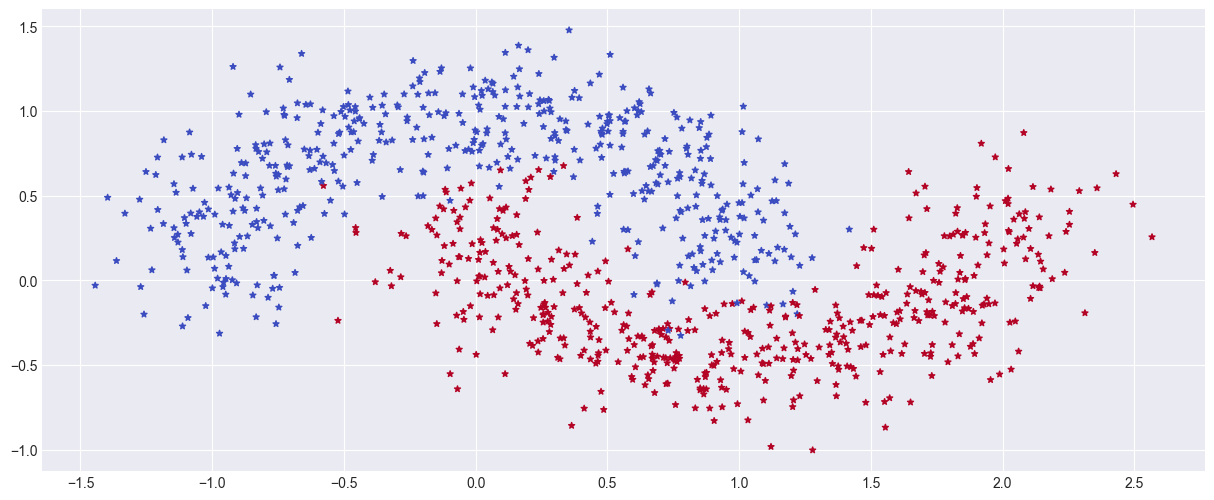

In [228]:
plt.scatter(X[:,0],X[:,1],s=20,c=y,marker='*',cmap=CMAP)

In [229]:
data_df=pd.DataFrame(X,columns=['A','B'])
data_df['target']=y
data_df.head()

,A,B,target
0,-0.111667,0.520224,1
1,1.142650,-0.342577,1
2,0.795558,-0.011442,1
3,0.111827,-0.551932,1
4,-0.816466,0.543996,0


In [230]:
y=pd.get_dummies(y).to_numpy()

In [231]:
# data_train,data_test=data_df.to_numpy()[:900],data_df.to_numpy()[900:]
# data_train.shape,data_test.shape

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800, 2), (200, 2))

In [233]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [234]:
def fn_softmax(z):
    exp_score=np.exp(z-np.max(z))
    return exp_score/np.sum(exp_score,axis=1,keepdims=True)

In [235]:
sm=fn_softmax(np.asarray([[-1.0,0,1.0],[-10,0,-8]]))

In [236]:
def fn_sigmoid(z: np.ndarray):
    return 1/(1+np.exp(-z))

In [237]:
def fn_activ(z):
    return np.tanh(z)

def fn_activ_prime(z):
    return 1.0 - np.tanh(z)**2

In [238]:
fn_activ(np.asarray([[-1, 0, 1.0],[-np.inf, 0, np.inf]]))

array([[-0.76159416,  0.        ,  0.76159416],
       [-1.        ,  0.        ,  1.        ]])

In [239]:
sm=fn_sigmoid(np.asarray([-np.inf,-1,0,1.0, np.inf]))
print(sm)

[0.         0.26894142 0.5        0.73105858 1.        ]


In [240]:
def predict(model,X_p):

    W1=model['W1']
    W2=model['W2']
    W3=model["W3"]
    W4=model["W4"]
    W5=model["W5"]
    b1=model['b1']
    b2=model['b2']
    b3=model['b3']
    b4=model['b4']
    b5=model["b5"]
    #Forward Propagation
    ## forward propagation
    z1 = X_p.dot(W1) + b1   #Aggregation
    a1 = fn_activ(z1)   #Activation

    z2 = a1.dot(W2) + b2  #Aggregation
    a2 = fn_activ(z2)   #Activation

    z3=a2.dot(W3) + b3  #Aggregation
    a3 = fn_activ(z3)   #Activation

    z4=a3.dot(W4) + b4  #Aggregation
    a4 = fn_activ(z4)   #Activation

    z5=a4.dot(W5) + b5  #Aggregation
    a5 = fn_softmax(z5) #Activation

    return a5.argmax(axis=1)

In [241]:
def calculate_loss(model,X_l,y_l):
    W1=model['W1']
    W2=model['W2']
    W3=model["W3"]
    W4=model["W4"]
    W5=model["W5"]
    b1=model['b1']
    b2=model['b2']
    b3=model['b3']
    b4=model['b4']
    b5=model["b5"]
    m=X_l.shape[0]
    #Forward Propagation
    ## forward propagation
    z1 = X_l.dot(W1) + b1   #Aggregation
    a1 = fn_activ(z1)   #Activation

    z2 = a1.dot(W2) + b2  #Aggregation
    a2 = fn_activ(z2)   #Activation

    z3=a2.dot(W3) + b3  #Aggregation
    a3 = fn_activ(z3)   #Activation

    z4=a3.dot(W4) + b4  #Aggregation
    a4 = fn_activ(z4)   #Activation

    z5=a4.dot(W5) + b5  #Aggregation
    a5 = fn_softmax(z5) #Activation
    data_loss=-(y_l*np.log(a5)+(1-y_l)*np.log(1-a5)).sum()
    return data_loss/m

In [242]:
# weights=np.array([0.1,2.0,1.0]) #eXAMPLE WEIGHTS: Bias, weight1, weight2
# predict(data_df.loc[0].to_numpy(),weights)

In [243]:
def build_model(h_dim, X_tr, y_tr,X_ts,y_ts,alpha, n_epochs):
    m=X_tr.shape[0]
    nn_output_dim = y.shape[1]

    W1 = rng.random((param['h_dim'][0], param['h_dim'][1]))/ np.sqrt(param['h_dim'][0])
    W2 = rng.random((param['h_dim'][1], param['h_dim'][2]))/ np.sqrt(param['h_dim'][1])
    W3 = rng.random((param['h_dim'][2], param['h_dim'][3]))/ np.sqrt(param['h_dim'][2])
    W4 = rng.random((param['h_dim'][3], param['h_dim'][4]))/ np.sqrt(param['h_dim'][3])
    W5 = rng.random((param['h_dim'][4], param['h_dim'][5]))/ np.sqrt(param['h_dim'][4])

    b1 = np.zeros((1, param['h_dim'][1]))
    b2 = np.zeros((1, param['h_dim'][2]))
    b3 = np.zeros((1, param['h_dim'][3]))
    b4 = np.zeros((1, param['h_dim'][4]))
    b5 = np.zeros((1, param['h_dim'][5]))


    loss, epochs , tloss= [], [],[]

    for i in range(n_epochs) :
        #Forward Propagation
        z1 = X_tr.dot(W1) + b1   #Aggregation
        a1 = fn_activ(z1)   #Activation

        z2 = a1.dot(W2) + b2  #Aggregation
        a2 = fn_activ(z2)   #Activation

        z3=a2.dot(W3) + b3  #Aggregation
        a3 = fn_activ(z3)   #Activation

        z4=a3.dot(W4) + b4  #Aggregation
        a4 = fn_activ(z4)   #Activation

        z5=a4.dot(W5) + b5  #Aggregation
        a5 = fn_softmax(z5) #Activation



        #Back Propagation
        #Layer5
        dz5 = a5 - y_tr
        assert(z5.shape == dz5.shape), f" Shape z5 {z5.shape} {dz5.shape}"
        dw5 = (a4.T).dot(dz5)
        assert(W5.shape == dw5.shape), f" Shape w5 {W5.shape} {dw5.shape}"
        db5 = np.sum(dz5, axis=0, keepdims=True)
        assert(b5.shape == db5.shape), f" Shape b5 {b5.shape} {db5.shape}"
        da4 = dz5.dot(W5.T)
        assert(a4.shape == da4.shape), f" Shape a4 {a4.shape} {da4.shape}"

        #Layer4
        dz4 = da4 * fn_activ_prime(z4)
        assert(z4.shape == dz4.shape), f" Shape z4 {z4.shape} {dz4.shape}"
        dw4 = (a3.T).dot(dz4)
        assert(W4.shape == dw4.shape), f" Shape w4 {W4.shape} {dw4.shape}"
        db4= np.sum(dz4, axis=0, keepdims=True)
        assert(b4.shape == db4.shape), f" Shape b4 {b4.shape} {db4.shape}"
        da3 = dz4.dot(W4.T)
        assert(a3.shape == da3.shape), f" Shape a3 {a3.shape} {da3.shape}"

        #Layer3
        dz3 = da3 * fn_activ_prime(z3)
        assert(z3.shape == dz3.shape), f" Shape z3 {z3.shape} {dz3.shape}"
        dw3 = (a2.T).dot(dz3)
        assert(W3.shape == dw3.shape), f" Shape w3 {W3.shape} {dw3.shape}"
        db3= np.sum(dz3, axis=0, keepdims=True)
        assert(b3.shape == db3.shape), f" Shape b3 {b3.shape} {db3.shape}"
        da2 = dz3.dot(W3.T)
        assert(a2.shape == da2.shape), f" Shape a2 {a2.shape} {da2.shape}"

        #Layer2
        dz2 = da2 * fn_activ_prime(z2)
        assert(z2.shape == dz2.shape), f" Shape z2 {z2.shape} {dz2.shape}"
        dw2 = (a1.T).dot(dz2)
        assert(W2.shape == dw2.shape), f" Shape w2 {W2.shape} {dw2.shape}"
        db2= np.sum(dz2, axis=0, keepdims=True)
        assert(b2.shape == db2.shape), f" Shape b2 {b2.shape} {db2.shape}"
        da1 = dz2.dot(W2.T)
        assert(a1.shape == da1.shape), f" Shape a1 {a1.shape} {da1.shape}"

        #Layer1 (Hidden Layer)
        dz1 = da1*fn_activ_prime(z1)
        assert(z1.shape == dz1.shape), f" Shape z1 {z1.shape} {dz1.shape}"
        dw1 = (X_tr.T).dot(dz1)
        assert(W1.shape == dw1.shape), f" Shape w1 {W1.shape} {dw1.shape}"
        db1 = np.sum(dz1, axis=0, keepdims=True)
        assert(b1.shape == db1.shape), f" Shape b2 {b1.shape} {db1.shape}"

        W1 = W1 - alpha * dw1/m
        b1 = b1 - alpha * db1/m
        W2 = W2 - alpha * dw2/m
        b2 = b2 - alpha * db2/m
        W3 = W3 - alpha * dw3/m
        b3 = b3 - alpha * db3/m
        W4 = W4 - alpha * dw4/m
        b4 = b4 - alpha * db4/m
        W5 = W5 - alpha * dw5/m
        b5 = b5 - alpha * db5/m






        model = {'W1': W1, 'W2':W2, 'b1':b1, 'b2':b2, 'W3': W3, 'W4':W4, 'b3':b3, 'b4':b4, 'W5': W5, 'b5':b5}
        curr_loss = calculate_loss(model, X_tr, y_tr)
        curr_ts_loss= calculate_loss(model, X_ts, y_ts)
        epochs.append(i)
        loss.append(curr_loss)
        tloss.append(curr_ts_loss)
        if i%1000 == 0 :
            print(f"epoch - {i} : loss - {curr_loss}")
    loss_hist['epoch'] = epochs
    loss_hist['test_loss'] = tloss
    loss_hist['loss'] = loss
    return model





In [244]:
# pd.DataFrame(y_train).shape
loss_hist = {}
param={}
param['h_dim']=[X_train.shape[1],100,50,40,30,y_train.shape[1]]
# y_train = y_train.reshape(-1,1)
y_train.shape

(800, 2)

In [245]:
param

{'h_dim': [2, 100, 50, 40, 30, 2]}

In [246]:
model = build_model(param, X_train, y_train, X_test, y_test, alpha=ALPHA, n_epochs=EPOCHS )
# model['W1'].shape, model['W2'].shape, model['b1'].shape, model['b2'].shape

epoch - 0 : loss - 1.3327101144591944
epoch - 1000 : loss - 1.2734096705258466
epoch - 2000 : loss - 1.2281017306826945
epoch - 3000 : loss - 1.1217969475440654
epoch - 4000 : loss - 1.0544264797551213
epoch - 5000 : loss - 0.9534702900759712
epoch - 6000 : loss - 0.8618823159503199
epoch - 7000 : loss - 0.754072338434155
epoch - 8000 : loss - 0.7432870462982537
epoch - 9000 : loss - 0.7345514491627517
epoch - 10000 : loss - 0.7232468525434385
epoch - 11000 : loss - 0.7066182647678807
epoch - 12000 : loss - 0.6826303014849838
epoch - 13000 : loss - 0.6503384923542245
epoch - 14000 : loss - 0.607528305257744
epoch - 15000 : loss - 0.46880164408723324
epoch - 16000 : loss - 0.21663670707308483
epoch - 17000 : loss - 0.16443017491430262
epoch - 18000 : loss - 0.1537237837339643
epoch - 19000 : loss - 0.14927718470044693
epoch - 20000 : loss - 0.14637190994588065


In [247]:
# error,weights=train_weights(train=data_train,alpha=ALPHA,n_epochs=EPOCHS)
# weights

In [248]:
loss_df=pd.DataFrame(loss_hist)
loss_df.head()

,epoch,test_loss,loss
0,0,1.304614,1.332710
1,1,1.291508,1.325286
2,2,1.281157,1.319810
3,3,1.272920,1.315760
4,4,1.266318,1.312756


Text(0, 0.5, 'Loss')

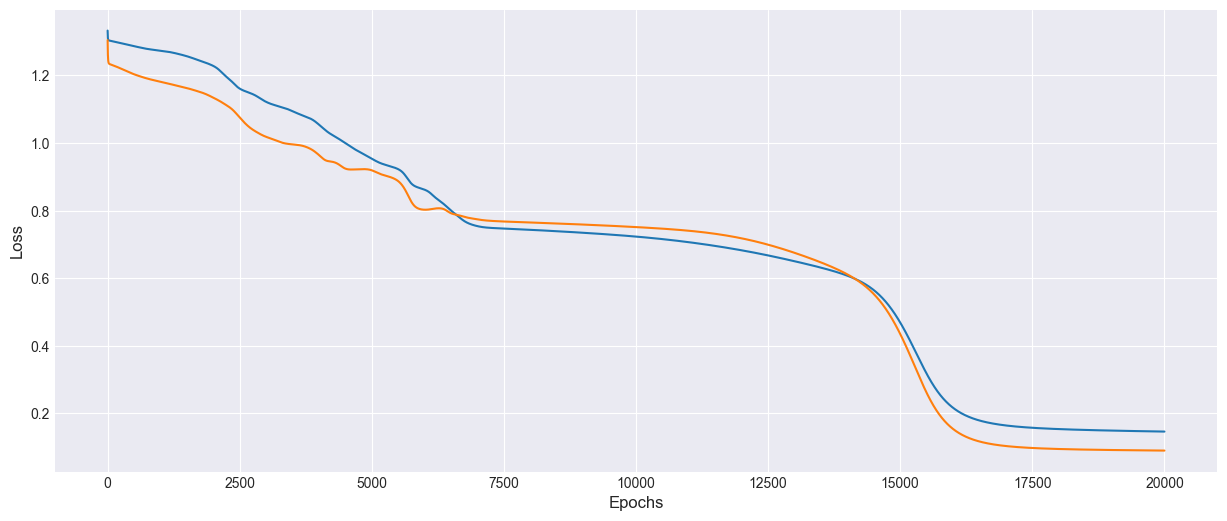

In [249]:
# plt.figure(figsize=(10,4))
fig,ax=plt.subplots()
ax.plot(loss_df['epoch'], loss_df['loss'])
ax.plot(loss_df['epoch'], loss_df['test_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

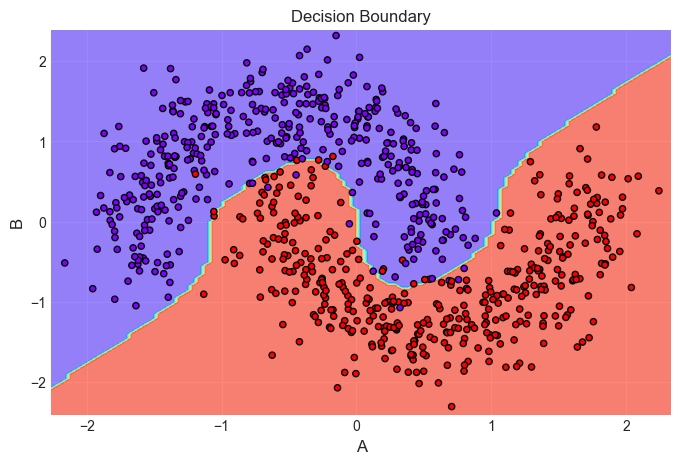

In [250]:
fn_plot_decision_boundary(X_train,y_train.argmax(axis=1),model,predict)

PERFORMING ON TRAINING DATA

In [251]:
y_pred=predict(model,X_train)
y_pred.shape,y_train.shape

((800,), (800, 2))

In [252]:
print(f'Accuracy Score: {accuracy_score(y_train.argmax(axis=1),y_pred)}')

Accuracy Score: 0.97125


In [253]:
print(classification_report(y_train.argmax(axis=1),y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       400
           1       0.97      0.97      0.97       400

    accuracy                           0.97       800
   macro avg       0.97      0.97      0.97       800
weighted avg       0.97      0.97      0.97       800



Text(0.5, 1.0, 'F1 Score: 0.9712499550780548')

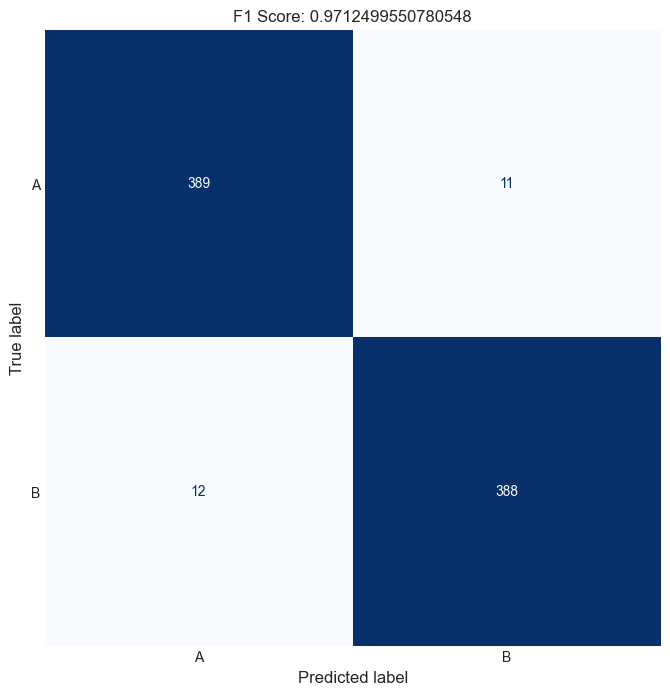

In [254]:

cm=confusion_matrix(y_train.argmax(axis=1),y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['A','B'])
fig,ax=plt.subplots(figsize=(8,8))
disp.plot(ax=ax,cmap='Blues',colorbar=False)
ax.grid(False)
ax.set_title(f'F1 Score: {f1_score(y_train.argmax(axis=1),y_pred,average='weighted')}')

Performance on TEST

In [255]:
y_pred=predict(model,X_test)
y_pred.shape,y_test.shape

((200,), (800, 2))

In [256]:
print(f'Accuracy Score: {accuracy_score(y_test.argmax(axis=1),y_pred)}')

Accuracy Score: 0.985


In [257]:
print(classification_report(y_test.argmax(axis=1),y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       100
           1       0.99      0.98      0.98       100

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



In [257]:
cm=confusion_matrix(y_test.argmax(axis=1),y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['A','B'])
fig,ax=plt.subplots(figsize=(8,8))
disp.plot(ax=ax,cmap='Blues',colorbar=False)
ax.grid(False)
ax.set_title(f'F1 Score: {f1_score(y_test.argmax(axis=1),y_pred,average='weighted')}')